# Assignment

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show,output_notebook

output_notebook()

# read "Chocolate_Sales.csv"
df = pd.read_csv("Chocolate_Sales.csv")

Loading BokehJS ...

# Data Cleaning & Data Processing

In [3]:
# find the sum of the null row 
df.isnull().sum()
# since it is zero for each column, therefore there is no empty data

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [4]:
# find the sum of the duplicated row
df.duplicated().sum()
#Since there is no duplicate data, therefore there is no need to remove duplicate

0

In [5]:
# Format the date and change its type into datetime
df["Date"] = pd.to_datetime(df["Date"], format='%d-%b-%y')

In [6]:
# remove the dollar sign infront of the amount and the ',' in the dollar sign
def removeDollarSign(money):
    return money.replace("$", "").replace(",","")

# Change its type into numeric after removing the dollar sign
df["Amount"] = pd.to_numeric(df["Amount"].apply(removeDollarSign))

In [7]:
# Check whether there is amount that is negative value
print("[Amount] that is negative value: ",df[df["Amount"] < 0]["Amount"].count())
#There is no Amount that is negative number

# Check whether there is boxes shipped that is negative value
print("[Boxes Shipped] that is negative value: ",df[df["Boxes Shipped"] < 0]["Boxes Shipped"].count())
#There is no Boxes Shipped that is negative number

[Amount] that is negative value:  0
[Boxes Shipped] that is negative value:  0


In [8]:
# Create another column called "Month" for later use
df["Month"] = df["Date"].dt.month
df.head(5)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94,8
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91,7
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342,4
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184,2


# Exploratory Data Analysis (EDA)

### a. The general information about the entire data set Chocolate_Sales.csv 

In [9]:
df.head(5)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94,8
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91,7
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342,4
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184,2


In [10]:
df.tail(5)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410,323,5
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559,119,6
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574,217,7
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086,384,7
1093,Karlen McCaffrey,India,70% Dark Bites,2022-05-23,5075,344,5


In [11]:
df.sample(5)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
22,Marney O'Breen,USA,After Nines,2022-05-30,4753,163,5
404,Marney O'Breen,UK,Orange Choco,2022-06-06,11319,12,6
336,Gigi Bohling,UK,70% Dark Bites,2022-06-21,840,81,6
203,Jan Morforth,Australia,White Choc,2022-07-27,3472,32,7
173,Van Tuxwell,Canada,Almond Choco,2022-06-27,3213,72,6


In [12]:
df.shape

(1094, 7)

There are 1094 rows and 7 columns

In [13]:
df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'Month'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   int64         
 5   Boxes Shipped  1094 non-null   int64         
 6   Month          1094 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(3)
memory usage: 55.7+ KB


In [15]:
df.dtypes

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                    int64
Boxes Shipped             int64
Month                     int32
dtype: object

In [16]:
df[["Amount","Boxes Shipped"]].describe()

,Amount,Boxes Shipped
count,1094.000000,1094.000000
mean,5652.308044,161.797989
std,4102.442014,121.544145
min,7.000000,1.000000
25%,2390.500000,70.000000
50%,4868.500000,135.000000
75%,8027.250000,228.750000
max,22050.000000,709.000000


In [17]:
df.describe(include='object')

,Sales Person,Country,Product
count,1094,1094,1094
unique,25,6,22
top,Kelci Walkden,Australia,50% Dark Bites
freq,54,205,60


### b. List the chocolates sold out to India. 

In [18]:
# Find all the name of the chocolates that sold out to India
products = df.loc[df["Country"] == "India"]["Product"]

# Find the name of chocolates
products.unique()

array(['85% Dark Bars', 'Peanut Butter Cubes', 'Smooth Sliky Salty',
       'Fruit & Nut Bars', 'Manuka Honey Choco', 'Spicy Special Slims',
       'Eclairs', 'Almond Choco', '99% Dark & Pure', '50% Dark Bites',
       'Organic Choco Syrup', 'Raspberry Choco', 'Orange Choco',
       'Caramel Stuffed Bars', "Baker's Choco Chips", 'After Nines',
       'Drinking Coco', '70% Dark Bites', 'Milk Bars', 'Mint Chip Choco',
       'Choco Coated Almonds', 'White Choc'], dtype=object)

### c. Identify the salesperson with the highest sales by ranking them based on sales amount. 

In [19]:
# Sum the amount based on the sales person and sort it descendingly.
df.groupby(["Sales Person"])["Amount"].sum().sort_values(ascending=False)

Sales Person
Ches Bonnell           320901
Oby Sorrel             316645
Madelene Upcott        316099
Brien Boise            312816
Kelci Walkden          311710
Van Tuxwell            303149
Dennison Crosswaite    291669
Beverie Moffet         278922
Kaine Padly            266490
Marney O'Breen         259742
Barr Faughny           258713
Roddy Speechley        251062
Gunar Cockshoot        238483
Gigi Bohling           232666
Karlen McCaffrey       223895
Jehu Rudeforth         220976
Jan Morforth           219667
Curtice Advani         216461
Rafaelita Blaksland    210245
Husein Augar           205212
Andria Kimpton         201747
Mallorie Waber         200592
Camilla Castle         196616
Dotty Strutley         190624
Wilone O'Kielt         138523
Name: Amount, dtype: int64

Ches Bonnell 

### d. Find all sales region or store location where the transaction took place. 


In [20]:
# Find all sales region or store location
df["Country"].unique()

array(['UK', 'India', 'Australia', 'New Zealand', 'USA', 'Canada'],
      dtype=object)

Australia Canada India New Zealand UK USA

### e. Do additional EDA steps to explain your problem definition in detail.

### Which chocolate products generate the highest revenue?

In [21]:
# Use Product and Amount columns
revenue = df[["Product", "Amount"]]

# Find the revenue by grouping the product based on the sum of the amount and sort it ascendingly
max_rev = revenue.groupby("Product")["Amount"].sum().sort_values(ascending=False)
# Get the top 3 revenues
top3_rev = max_rev.head(3)
print(top3_rev)

Product
Smooth Sliky Salty    349692
50% Dark Bites        341712
White Choc            329147
Name: Amount, dtype: int64


Smooth Sliky Salty,50% Dark Bites and White Choc

### Which countries contribute most to the total sales?

In [22]:
# Find the country sales by grouping based on country and sum the amount and sort it in descending order
country_sales = df.groupby("Country")["Amount"].sum().sort_values(ascending=False)

# Find the top 3 countries sales
top3_country_sales =country_sales.head(3)
print(top3_country_sales)

Country
Australia    1137367
UK           1051792
India        1045800
Name: Amount, dtype: int64


Australia, UK and India

### Is there a correlation between the revenue (Amount) and the number of boxes shipped?



In [23]:
# Use only Amount and Boxes Shipped columns
amount_box_shipped = df[["Amount", "Boxes Shipped"]]

# Find the correlation between these two columns
amount_box_shipped.corr()

,Amount,Boxes Shipped
Amount,1.000000,-0.018827
Boxes Shipped,-0.018827,1.000000


No. There is no correlation between the revenue (Amount) and the number of boxes shipped. The correlation value is very close to 0, and slightly negative.

### Do sales vary significantly across different months?

In [24]:
# Group by the month and sum all the amount
amount_according_month = df.groupby(["Month"])["Amount"].sum() 
print(amount_according_month)
amount_according_month.describe()

Month
1    896105
2    699377
3    749483
4    674051
5    752892
6    865144
7    803425
8    743148
Name: Amount, dtype: int64


count         8.00000
mean     772953.12500
std       77118.45656
min      674051.00000
25%      732205.25000
50%      751187.50000
75%      818854.75000
max      896105.00000
Name: Amount, dtype: float64

Yes, sales do vary significantly across different months. Month 1 has the highest amount. In Contrast, Month 4 mark the lowest amount. 

### What percentage of total sales is contributed by the top 5 products?



In [25]:
# Find product sales by group the Product and calculate the sum of the amount and sort it in descending order
product_sales = df.groupby("Product")["Amount"].sum().sort_values(ascending=False)

# From the sorted products, select the top 5 highest sales amounts and calculate their combined total.
top_5_sales_amount = product_sales.head(5).sum()
print(top_5_sales_amount)

1657838


In [26]:
# Find the total sales 
total_sales_amount = product_sales.sum()
print(total_sales_amount)

6183625


In [27]:
# Calculate the percentage of the total sales contributed by the top 5 products
percentage = (top_5_sales_amount / total_sales_amount) * 100
print(f"Top 5 products contributed approximately {percentage:.2f}% of the total sales.")

Top 5 products contributed approximately 26.81% of the total sales.


# 2.5 Data Visualization

### a. Plot the suitable type of chart to the top 3 countries where the maximum number of boxes shipped.

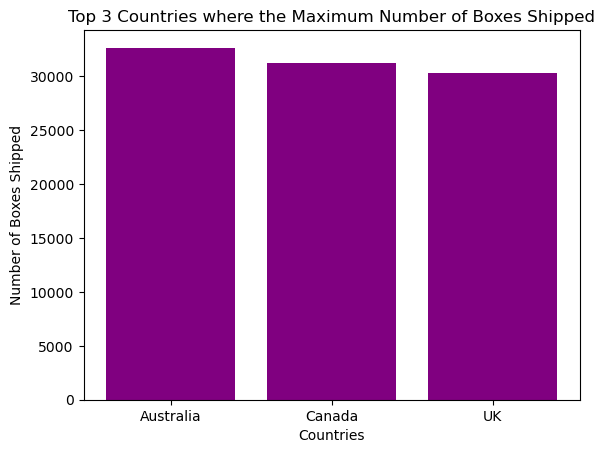

In [28]:
# Find Top 3 coutries by grouping based on the country and sum the boxes shipped and sort descendingly. Get only the first 3
top_3_countries = df.groupby("Country")["Boxes Shipped"].sum().sort_values(ascending=False).head(3)

# Set the title
plt.title("Top 3 Countries where the Maximum Number of Boxes Shipped")

# Plot a bar chart
plt.bar(x=top_3_countries.index,height=top_3_countries, color="purple")

# Label x-axis
plt.xlabel("Countries")

# Label y-axis
plt.ylabel("Number of Boxes Shipped")

# Show the plot
plt.show()

### b. Select the appropriate chart type to create an interactive visualization of the monthly sales report categorized by country.

In [ ]:
# grouped = df.groupby(["Month","Country"])["Amount"].sum()
# print(grouped.index)

p = figure( height=600, width=800,
           title="Monthly Sales by Country",
             x_axis_label="Month", y_axis_label="Sales Amount",
             toolbar_location="above",
           tools="pan,box_zoom,reset,save,hover")

australia_amount = df[df["Country"] == "Australia"].groupby("Month")["Amount"].sum()
canada_amount = df[df["Country"] == "Canada"].groupby("Month")["Amount"].sum()
uk_amount = df[df["Country"] == "UK"].groupby("Month")["Amount"].sum()
india_amount = df[df["Country"] == "India"].groupby("Month")["Amount"].sum()
usa_amount = df[df["Country"] == "USA"].groupby("Month")["Amount"].sum()
new_zealand_amount = df[df["Country"] == "New Zealand"].groupby("Month")["Amount"].sum()

p.line(x=australia_amount.index, y=australia_amount,legend_label="Australia",color='green')
p.scatter(x=australia_amount.index,y=australia_amount,color='green')
p.line(x=canada_amount.index, y=canada_amount,legend_label="Canada",color='red')
p.scatter(x=canada_amount.index,y=canada_amount,color='red')
p.line(x=uk_amount.index, y=uk_amount,legend_label="UK",color='blue')
p.scatter(x=uk_amount.index,y=uk_amount,color='blue')
p.line(x=india_amount.index, y=india_amount,legend_label="India",color='orange')
p.scatter(x=india_amount.index,y=india_amount,color='orange',legend_label="India")
p.line(x=new_zealand_amount.index, y=new_zealand_amount,legend_label="New Zealand",color='brown')
p.scatter(x=new_zealand_amount.index,y=new_zealand_amount,color='brown', legend_label="New Zealand")



p.line(x=usa_amount.index, y=usa_amount,legend_label="USA",color='purple')
p.scatter(x=usa_amount.index,y=usa_amount,color='purple')


# Legend
# p.legend.orientation = "horizontal"
# p.legend.location = "top_center"

# muting glyphs
p.legend.click_policy="mute"
# p.line(x=)
show(p)
# TODO: Do a bokeh graph
# p=figure(width=1000,height=500, title=)

### c. Draw more graphs/interactive graphs to explain your problem definition in detail.

### Which chocolate products generate the highest revenue?


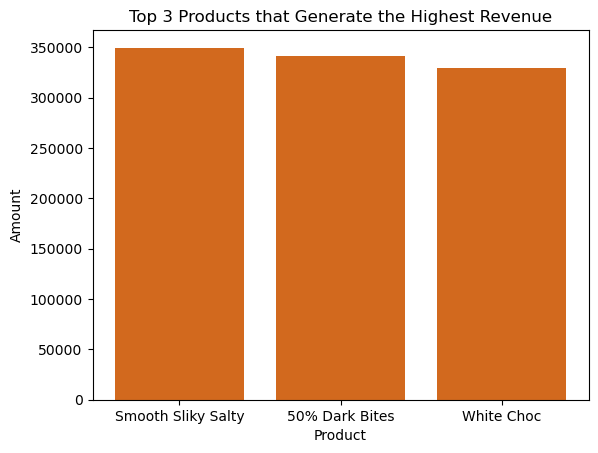

In [30]:
# Plot a bar chart with chocolate colour
plt.bar(x=top3_rev.index, height=top3_rev, color="chocolate")

# Set the title
plt.title("Top 3 Products that Generate the Highest Revenue")

# Set the x-axis label
plt.xlabel("Product")

# Set the y-axis label
plt.ylabel("Amount")

# Show the plot
plt.show()

### Which countries contribute most to the total sales?

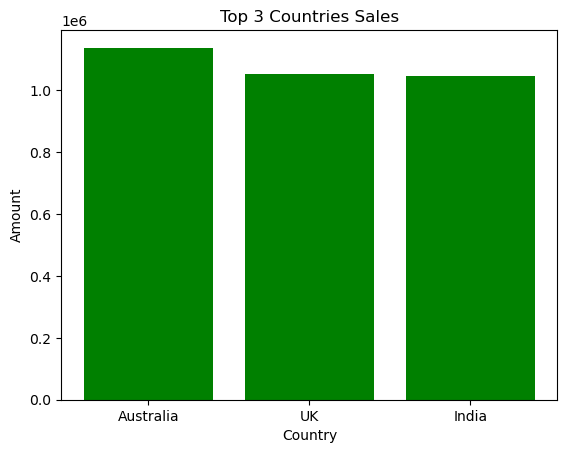

In [31]:
# Plot a bar chart with green colour
plt.bar(x=top3_country_sales.index, height=top3_country_sales,color="g")

# Set the title
plt.title("Top 3 Countries Sales")

# Set the x-axis label
plt.xlabel("Country")

# Set the y-axis label
plt.ylabel("Amount")

# Show the plot
plt.show()

### Do sales vary significantly across different months?

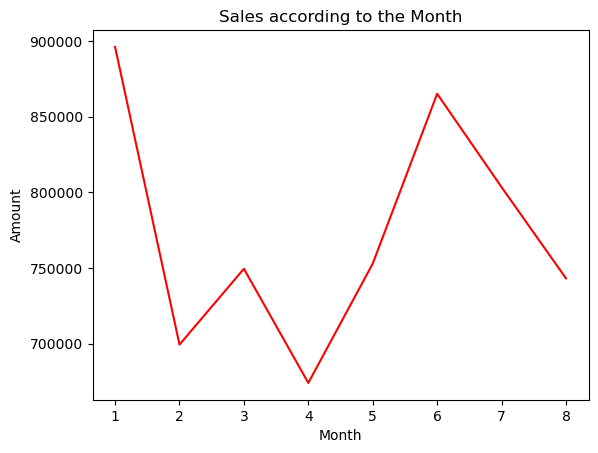

In [32]:
# Plot a line graph
plt.plot(amount_according_month.index, amount_according_month.values, color='red')

# Set the title
plt.title("Sales according to the Month")

# Set the x-axis label
plt.xlabel(xlabel="Month")

# Set the y-axis label
plt.ylabel(ylabel="Amount")

# Show the plot
plt.show()


Yes, sales do vary significantly across different months. From Month 1 to Month 2, there's a sharp drop in sales. Then there is a small recovery in Month 3. Another drop happens in Month 4, reaching the lowest point. Sales rise sharply again in Month 5 and peak around Month 6. After Month 6, sales decline steadily into Month 8.

